## 数据表


In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


这个矩阵的行称为样本samples 行数为n_samples;

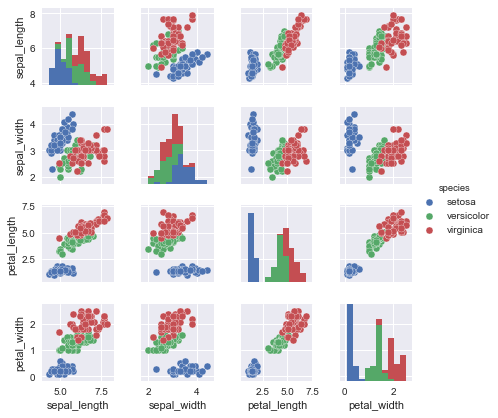

In [2]:
%matplotlib inline
sns.set()
sns.pairplot(iris,hue='species',size= 1.5);

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris =iris['species']
y_iris.shape

(150,)

## sklearn的评估器API

### 1.有监督学习demo：线性回归

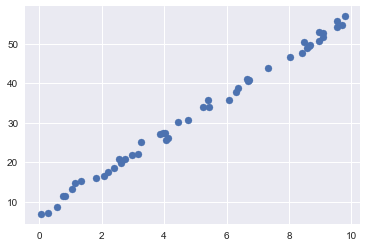

In [5]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(43)
x = 10*rng.rand(49)
y = 5 * x + 7 + rng.randn(49)
plt.scatter(x,y);

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)#设置拟合截距

In [7]:
# 将数据整理成特征矩阵和目标矩阵
X=x[:, np.newaxis]
X.shape

(49, 1)

In [8]:
#拟合数据
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
model.coef_

array([4.96642793])

In [10]:
model.intercept_

7.1348675695728545

In [11]:
#预测新数据的标签
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

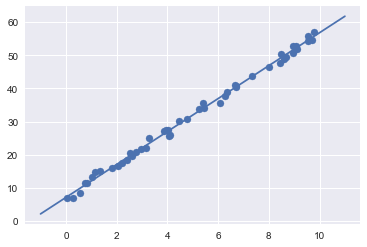

In [12]:
plt.scatter(x,y)
plt.plot(xfit, yfit);

### 2.有监督学习demo：鸢尾花数据分类

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state = 1)

In [14]:
#高斯贝叶斯预测
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_model  =model.predict(X_test)
#验证预测结果的准确性
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_model)

0.9736842105263158

### 3.无监督学习demo：鸢尾花数据降维

In [15]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)#设置超参数 初始化模型
model.fit(X_iris)#拟合数据，降维只用features！
X_2D = model.transform(X_iris)#将数据转化为2维

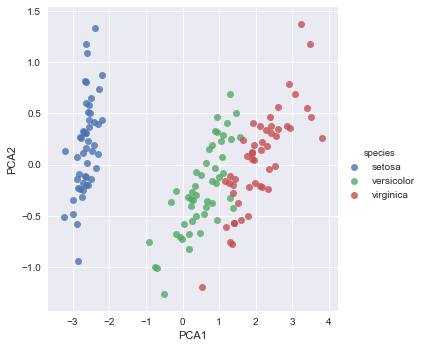

In [16]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', "PCA2", hue='species', data=iris, fit_reg=False);

### 5.无监督学习demo：鸢尾花数据聚类

In [17]:
from sklearn.mixture import GMM#高斯混合模型 用来聚类

In [18]:
model = GMM(n_components = 3, covariance_type = "full")
model.fit(X_iris)#不需要y变量
y_gmm = model.predict(X_iris)

D:\Software\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
D:\Software\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
D:\Software\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
D:\Software\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_mu

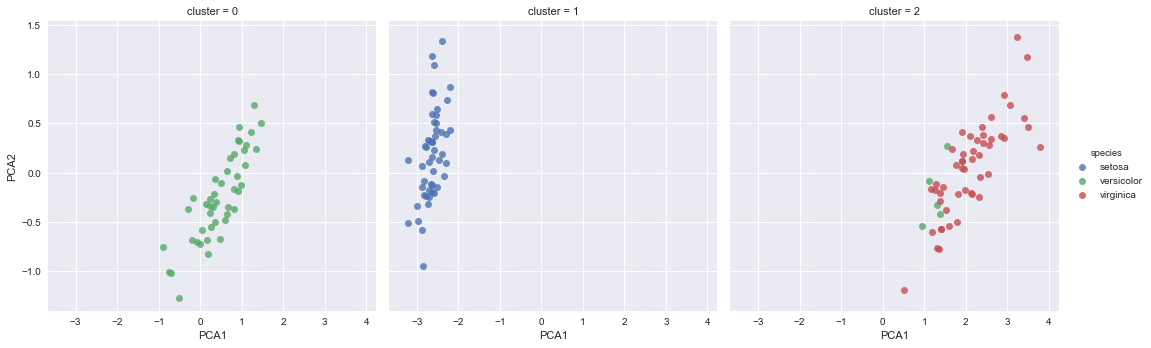

In [19]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1','PCA2',data = iris, hue = 'species', col = 'cluster', fit_reg = False)

### 应用：手写数字探索

1.加载并可视化手写数字

In [20]:
from sklearn.datasets import load_digits
digits= load_digits()
digits.images.shape

(1797, 8, 8)

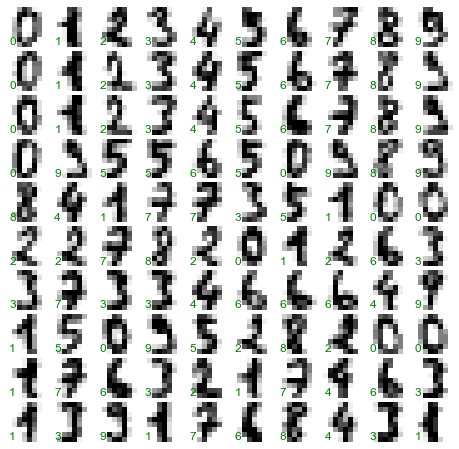

In [21]:
#图像数据为三位矩阵。1797个样本，每张为8*8像素
fig , axes = plt.subplots(10, 10, figsize = (8,8), subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace = 0.1, wspace = 0.1))
for i , ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform = ax.transAxes, color = 'green')

In [22]:
X = digits.data
X.shape

(1797, 64)

In [23]:
y = digits.target
y.shape

(1797,)

2.无监督学习：降维

In [24]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

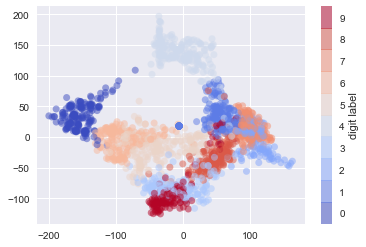

In [29]:
#数据投影到二维之后画出
plt.scatter(data_projected[:,0], data_projected[:, 1], c=digits.target,edgecolors='none',alpha=0.5,cmap = plt.cm.get_cmap('coolwarm',10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

3.数字分类

In [26]:
Xtrain, Xtest,ytrain,ytest = train_test_split(X,y, random_state = 0)

In [27]:
from sklearn.naive_bayes import  GaussianNB
model  =GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [28]:
from sklearn.metrics import  accuracy_score
accuracy_score(ytest,y_model)

0.8333333333333334

Text(92.68,0.5,'True LAbel')

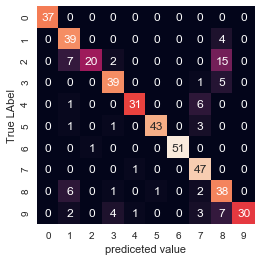

In [30]:
#采用混合矩阵
from sklearn.metrics import  confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat,square=True,annot=True, cbar= False)
plt.xlabel('prediceted value')
plt.ylabel('True LAbel')